# Supervised Learning (COMP0078) - Coursework 1
### Sage Bergerson, Enric Balaguer Rodon, CW1-16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import random
import multiprocessing as mp
import os

Mounted at /content/drive


# 1 Part I

# 1.1 Linear Regression

### Exercise 1

### a)

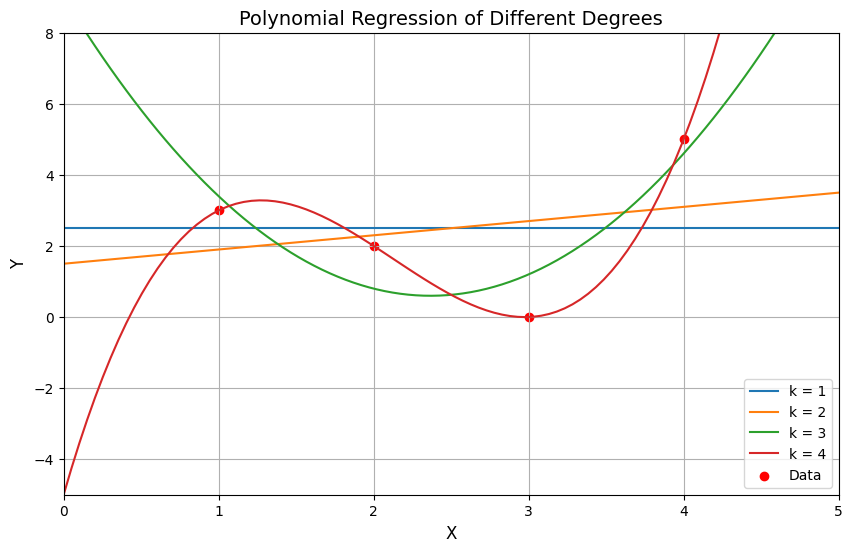

In [7]:
# Define data
data = np.array([(1, 3), (2, 2), (3, 0), (4, 5)])
x_data, y_data = data[:, 0], data[:, 1]

# Function: Transform data with polynomial basis
def poly_basis(x, degree):
  X = np.vander(x, degree, increasing=True)
  return X

# Function: Compute w
def lstsq(x_data, y_data):
  w = np.dot((np.dot(np.linalg.pinv(np.dot(x_data.T,x_data)),x_data.T)),y_data)
  return w

# Fit polynomials to data
degrees = [1, 2, 3, 4]
coeff = []

# Calculate coefficients
for degree in degrees:
  X = poly_basis(x_data, degree)
  coeff.append(lstsq(X, y_data))

# Generate x values
x_fit = np.linspace(0, 5, 100)
plt.figure(figsize=(10, 6))

for i, degree in enumerate(degrees):

  # Tranform x values with basis
  X_fit = poly_basis(x_fit, degree)

  # Calculate y values
  y_fit = np.dot(X_fit, coeff[i])
  plt.plot(x_fit, y_fit, label=f'k = {degree}')

# Plot results
plt.xlim(0, 5)
plt.ylim(-5, 8)
plt.scatter(x_data, y_data, label='Data', color='red')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.legend()
plt.title('Polynomial Regression of Different Degrees', fontsize = 14)
plt.grid(True)
plt.show()

### b)

In [3]:
# Equations for different polynomial degrees
k_1 = f"y = {round(coeff[0][0], 2)}"
k_2 = f"y = {round(coeff[1][0], 2)} + {round(coeff[1][1], 2)}x"
k_3 = f"y = {round(coeff[2][0], 2)} + {round(coeff[2][1], 2)}x + {round(coeff[2][2], 2)}x^2"
k_4 = f"y = {round(coeff[3][0], 2)} + {round(coeff[3][1], 2)}x + {round(coeff[3][2], 2)}x^2 + {round(coeff[3][3], 2)}x^3"

# Print results
print("k = 1: ", k_1)
print("k = 2: ", k_2)
print("k = 3: ", k_3)
print("k = 4: ", k_4)

k = 1:  y = 2.5
k = 2:  y = 1.5 + 0.4x
k = 3:  y = 9.0 + -7.1x + 1.5x^2
k = 4:  y = -5.0 + 15.17x + -8.5x^2 + 1.33x^3


### c)

In [4]:
# Number of data points
m = len(data)

# Calculate MSE for each polynomial
mse_1 = sum((coeff[0][0] - y_data) ** 2) / m
mse_2 = round(sum(((coeff[1][0] + coeff[1][1] * x_data) - y_data) ** 2) / m, 3)
mse_3 = round(sum(((coeff[2][0] + coeff[2][1] * x_data + coeff[2][2] * x_data**2) - y_data) ** 2) / m, 3)
mse_4 = sum(((coeff[3][0] + coeff[3][1] * x_data + coeff[3][2] * x_data**2 + coeff[3][3] * x_data**3) - y_data) ** 2) / m

# Print results
print("MSE for k = 1: ", mse_1)
print("MSE for k = 2: ", mse_2)
print("MSE for k = 3: ", mse_3)
print("MSE for k = 4: ", mse_4)

MSE for k = 1:  3.25
MSE for k = 2:  3.05
MSE for k = 3:  0.8
MSE for k = 4:  1.6293450702252936e-23


### Exercise 2

### a) i.

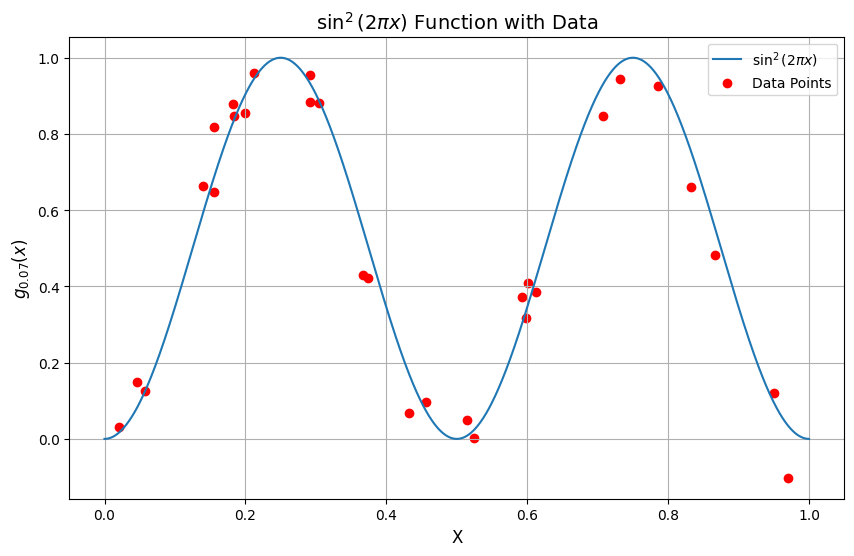

In [8]:
# Function: g_σ(x) basis
def g_sigma(x, sigma):

  # Compute sin^2(2πx) with added noise
  noise = np.random.normal(0, sigma, size=len(x))
  return np.sin(2 * np.pi * x)**2 + noise

# Random seed for reproducibility
np.random.seed(42)

# Sample x values uniformly at random from [0, 1]
x_values = np.random.uniform(0, 1, 30)

# Compute g_0.07(x) for each x
y_values = g_sigma(x_values, 0.07)

# Create a range of x values
x_range = np.linspace(0, 1, 1000)

# Compute corresponding y values
y_range = np.sin(2 * np.pi * x_range)**2

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label=r'$\sin^2(2\pi x)$')
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.xlabel('X', fontsize = 12)
plt.ylabel(r'$g_{0.07}(x)$', fontsize = 12)
plt.legend()
plt.title(r'$\sin^2(2\pi x)$ Function with Data', fontsize = 14)
plt.grid(True)
plt.show()

### ii.

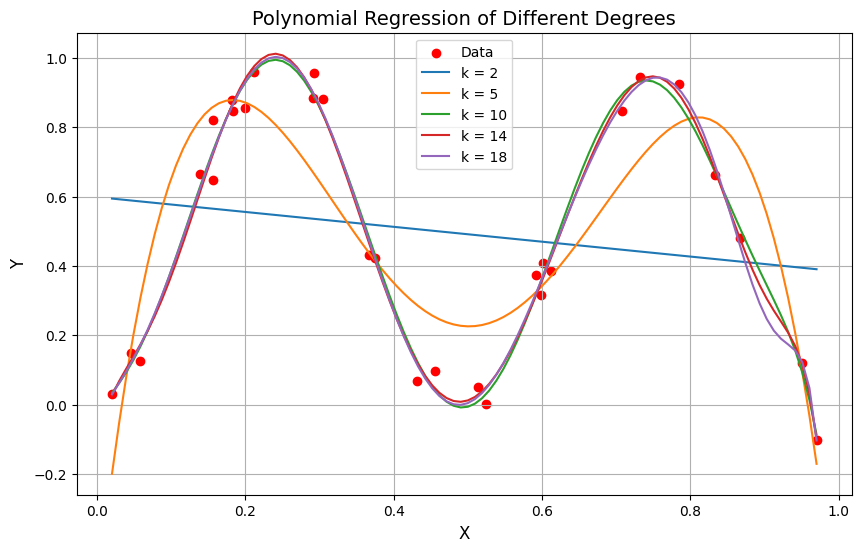

In [9]:
# Fit polynomials to data
degrees = [2, 5, 10, 14, 18]
coefficients = []

# Calculate coefficients
for degree in degrees:
  X = poly_basis(x_values, degree)
  coefficients.append(lstsq(X, y_values))

# Generate x values
x_fit = np.linspace(min(x_values), max(x_values), 100)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data', color='red')

for i, degree in enumerate(degrees):

  # Transform x values with basis
  X_fit = poly_basis(x_fit, degree)

  # Generate y values
  y_fit = np.dot(X_fit, coefficients[i])
  plt.plot(x_fit, y_fit, label=f'k = {degree}')

# Plot results
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.legend()
plt.title('Polynomial Regression of Different Degrees', fontsize = 14)
plt.grid(True)
plt.show()

### b)

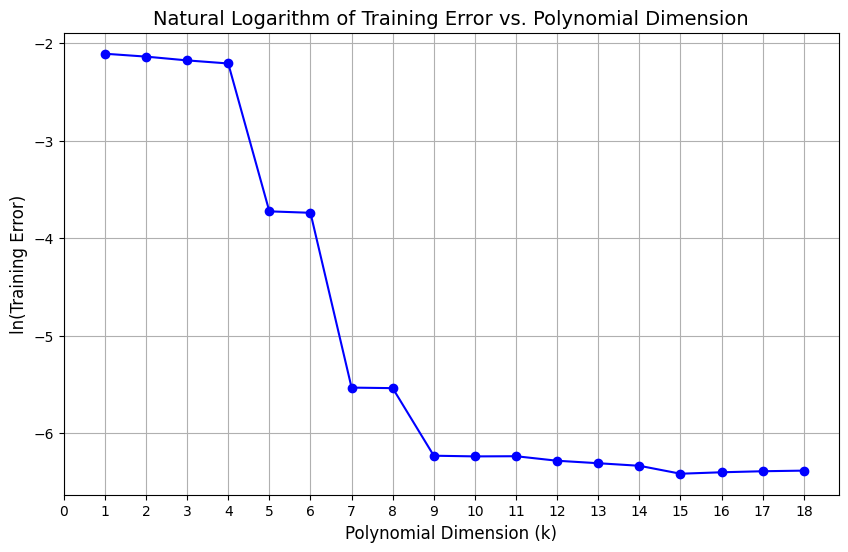

In [10]:
# Calculate ln of training error for each k
degrees = list(range(1, 19))
ln_training_errors = []

for degree in degrees:

  # Transform data with polynomial basis
  X = poly_basis(x_values, degree)

  # Calculate coefficients
  coefficients = lstsq(X, y_values)

  # Generate y values
  y_fit = np.dot(X, coefficients)

  # Calculate MSE for y values
  mse = np.mean((y_fit - y_values) ** 2)

  # Take the log of each MSE
  ln_mse = np.log(mse)
  ln_training_errors.append(ln_mse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_training_errors, marker='o', linestyle='-', color='b')
x_axis = list(range(0, 19))
default_x_ticks = range(len(x_axis))
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Training Error)', fontsize = 12)
plt.title('Natural Logarithm of Training Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

### c)

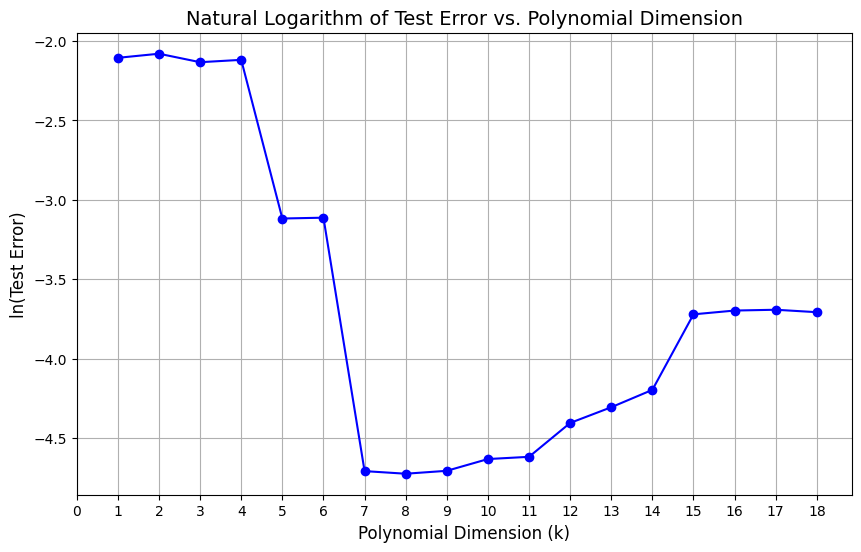

In [11]:
# Random seed for reproducibility
np.random.seed(42)

# Generate test set
x_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(x_test, 0.07)

# Calculate ln of MSE for each k
ln_test_errors = []

for degree in degrees:

  # Transform training data with polynomial basis
  X_train = poly_basis(x_values, degree)

  # Calculate coefficents for training data
  coefficients = lstsq(X_train, y_values)

  # Transform test data with polynomial basis
  X_test = poly_basis(x_test, degree)

  # Generate outcome predictions
  y_pred = np.dot(X_test, coefficients)

  # Calculate MSE
  mse = np.mean((y_pred - y_test) ** 2)

  # Take ln of MSE
  ln_mse = np.log(mse)
  ln_test_errors.append(ln_mse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_test_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Test Error)', fontsize = 12)
plt.title('Natural Logarithm of Test Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

### d)

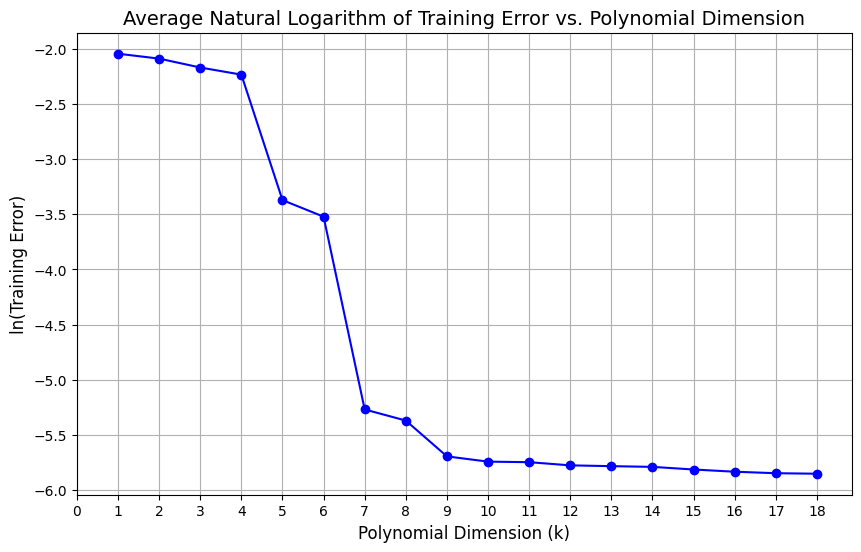

In [12]:
# Number of runs
num_runs = 100

# Array to store average ln(training error)
training_errors = np.zeros((num_runs, len(degrees)))

for run in range(num_runs):

  # Seed for reproducibility
  np.random.seed(run)

  # Generate new training set
  x_train = np.random.uniform(0, 1, 30)
  y_train = g_sigma(x_train, 0.07)

  for i, degree in enumerate(degrees):

    # Transform test data with polynomial basis
    X_train = poly_basis(x_train, degree)

    # Calculate coefficients
    coefficients = lstsq(X_train, y_train)

    # Generate predictions
    y_pred = np.dot(X_train, coefficients)

    # Calculate MSE
    mse = np.mean((y_pred - y_train) ** 2)

    # Take ln of MSE
    training_errors[run, i] = mse

# Calculate average ln mse over all runs
avg_training_errors = np.mean(training_errors, axis=0)
ln_avg_training_errors = np.log(avg_training_errors)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_avg_training_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Training Error)', fontsize = 12)
plt.title('Average Natural Logarithm of Training Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

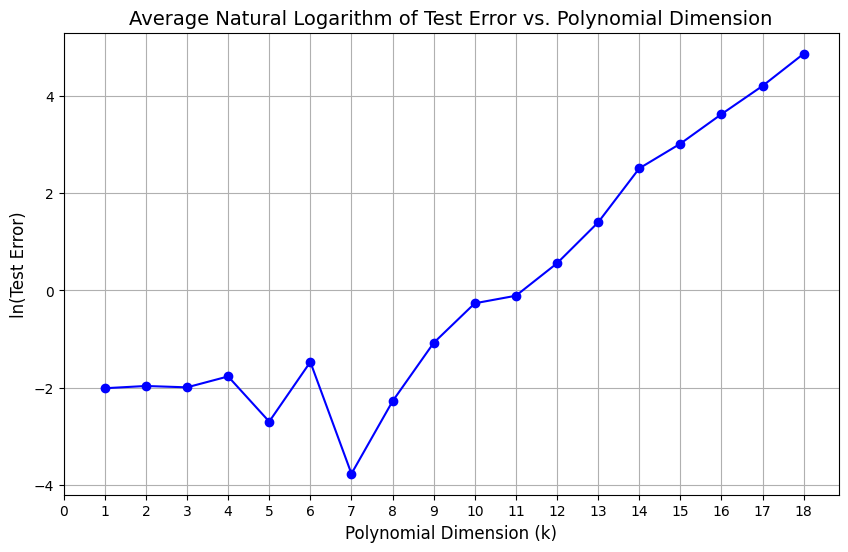

In [13]:
# Number of runs
num_runs = 100

# Array to store average ln(test error)
test_errors = np.zeros((num_runs, len(degrees)))

for run in range(num_runs):

  # Random seed for reproducibility
  np.random.seed(run)

  # Generate new training set
  x_train = np.random.uniform(0, 1, 30)
  y_train = g_sigma(x_train, 0.07)

  # Generate new test set
  x_test = np.random.uniform(0, 1, 1000)
  y_test = g_sigma(x_test, 0.07)

  for i, degree in enumerate(degrees):

    # Transform test data with basis
    X_train = poly_basis(x_train, degree)

    # Compute coefficients
    coefficients = lstsq(X_train, y_train)

    # Calculate predicted values on test set
    X_test = poly_basis(x_test, degree)
    y_pred = np.dot(X_test, coefficients)

    # Calculate MSE
    mse = np.mean((y_pred - y_test) ** 2)

    # Take ln of MSE
    test_errors[run, i] = mse

# Calculate average ln(test error) over all runs
avg_test_errors = np.mean(test_errors, axis=0)
ln_avg_test_errors = np.log(avg_test_errors)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_avg_test_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Test Error)', fontsize = 12)
plt.title('Average Natural Logarithm of Test Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

### Exercise 3

### b)

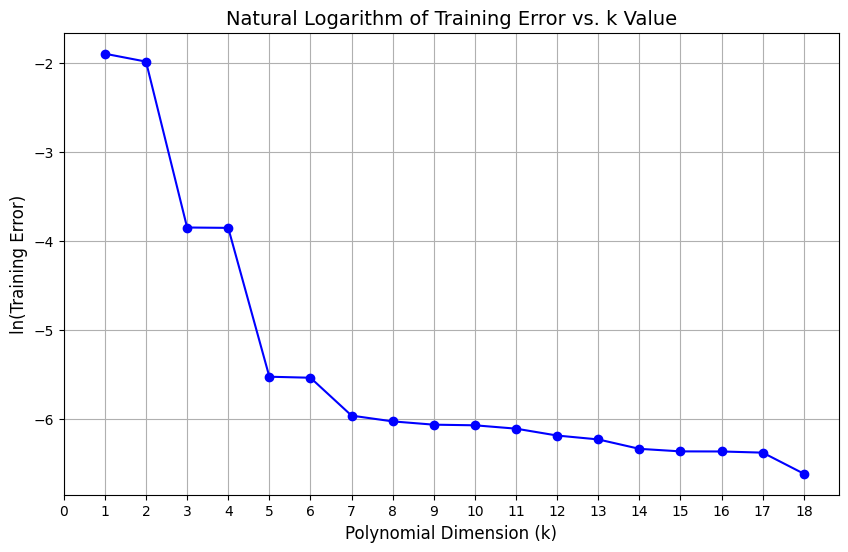

In [14]:
# Function: transform data with sin basis
def sin_basis(x, k):
  transformed = np.zeros((len(x), k))
  for i in range(k):
    transformed[:, i] = np.sin((i+1)*np.pi*x)
  return transformed

# Define polynomial dimensions
k_vals = list(range(1, 19))

# Array to store ln(training error)
ln_training_errors = np.zeros(len(k_vals))

# Random seed for reproducibility
np.random.seed(42)

for i, k_val in enumerate(k_vals):

  # Transform data with sin basis
  X_train = sin_basis(x_values, k_val)

  # Calculate coefficiencts
  coefficients = lstsq(X_train, y_values)

  # Calculate MSE
  y_pred = np.dot(X_train, coefficients)
  mse = np.mean((y_pred - y_values) ** 2)

  # Calculate ln(MSE)
  ln_mse = np.log(mse)
  ln_training_errors[i] = ln_mse

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_vals, ln_training_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Training Error)', fontsize = 12)
plt.title('Natural Logarithm of Training Error vs. k Value', fontsize = 14)
plt.grid(True)
plt.show()

### c)

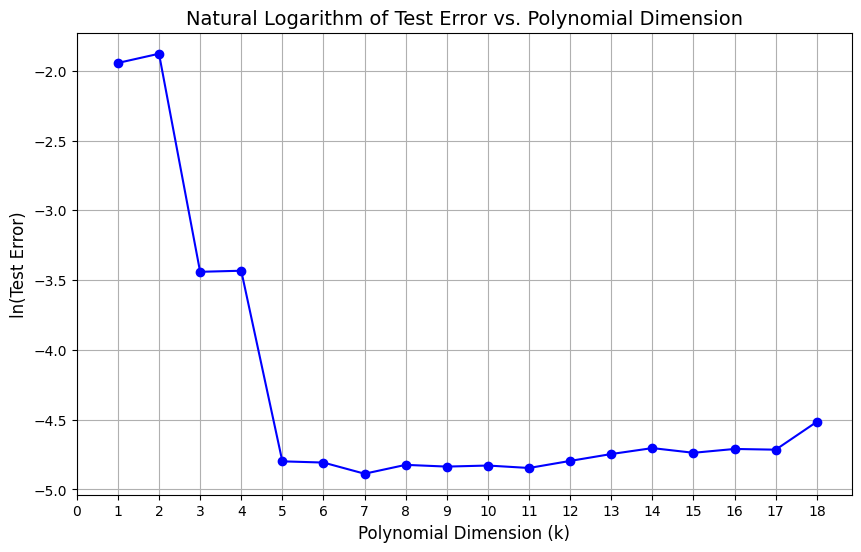

In [15]:
# Array to store ln(test error)
ln_test_errors = np.zeros(len(k_vals))

# Random seed for reproducibility
np.random.seed(42)

# Generate training set
x_train = np.random.uniform(0, 1, 30)
y_train = g_sigma(x_train, 0.07)

# Generate test set
x_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(x_test, 0.07)

for i, k_val in enumerate(k_vals):

  # Transform training data with sin basis
  X_train = sin_basis(x_train, k_val)

  # Calculate coefficients
  coefficients = lstsq(X_train, y_train)

  # Transform test data with sin basis
  X_test = sin_basis(x_test, k_val)

  # Calculate predicted values on the test set
  y_pred = np.dot(X_test, coefficients)

  # Calculate MSE
  mse = np.mean((y_pred - y_test) ** 2)

  # Take ln(MSE)
  ln_mse = np.log(mse)
  ln_test_errors[i] = ln_mse

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_test_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Test Error)', fontsize = 12)
plt.title('Natural Logarithm of Test Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

### d)

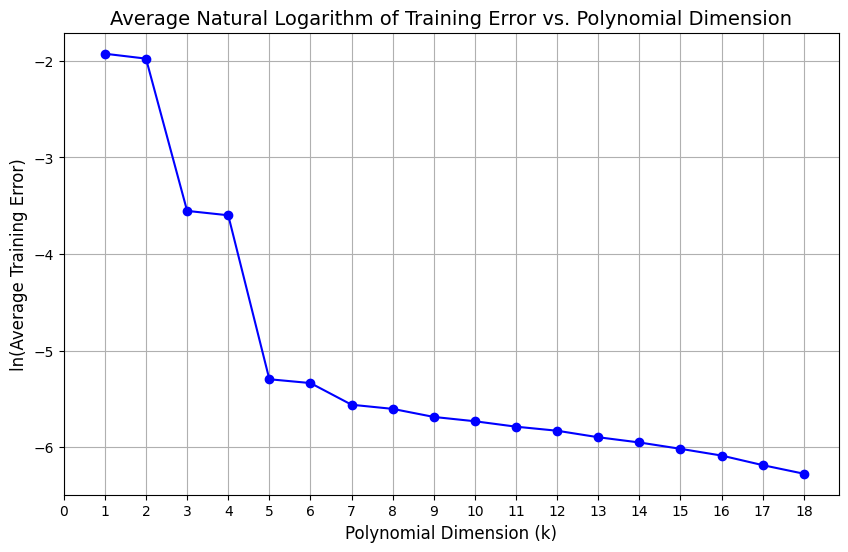

In [16]:
# Number of runs
num_runs = 100

# Array to store ln(training error)
training_errors = np.zeros((num_runs, len(k_vals)))

for run in range(num_runs):

  # Random seed for reproducibility
  np.random.seed(run)

  # Generate new training set
  x_train = np.random.uniform(0, 1, 30)
  y_train = g_sigma(x_train, 0.07)

  # Define polynomial dimension
  k_values = list(range(1, 19))

  for i, k_val in enumerate(k_vals):

    # Transform data with polynomial basis
    k = k_values[i]
    X_train = sin_basis(x_train, k_val)

    # Compute coefficients
    coefficients = lstsq(X_train, y_train)

    # Calculate MSE
    y_pred = np.dot(X_train, coefficients)
    mse = np.mean((y_pred - y_train) ** 2)

    # Take ln(MSE)
    training_errors[run, i] = mse

# Calculate average of ln(MSE)
avg_training_errors = np.mean(training_errors, axis=0)
ln_avg_training_errors = np.log(avg_training_errors)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_avg_training_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Average Training Error)', fontsize = 12)
plt.title('Average Natural Logarithm of Training Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

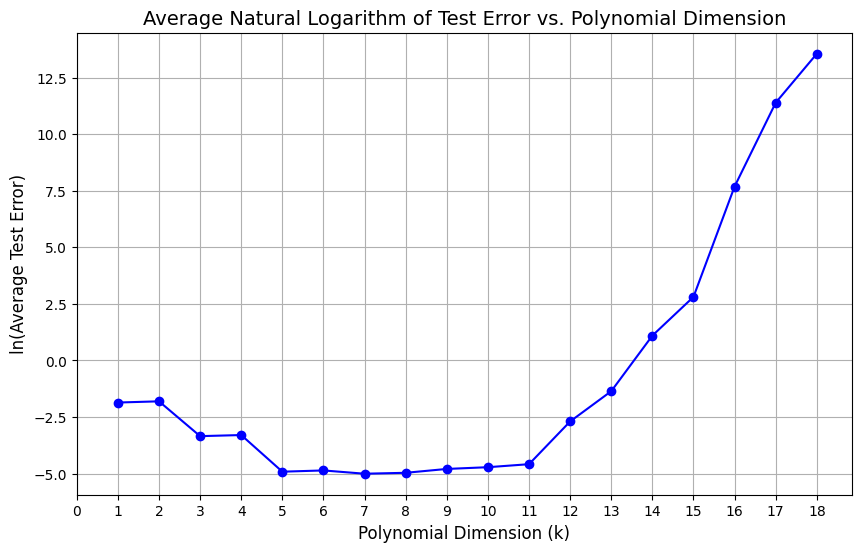

In [17]:
# Number of runs
num_runs = 100

# Initialize an array to store ln MSEs
test_errors = np.zeros((num_runs, len(degrees)))

for run in range(num_runs):

  # Random seed for reproducibility
  np.random.seed(run)

  # Generate new training set
  x_train = np.random.uniform(0, 1, 30)
  y_train = g_sigma(x_train, 0.07)

  for i, degree in enumerate(degrees):

    # Generate new test set
    x_test = np.random.uniform(0, 1, 1000)

    # Fit polynomial of dimension k to training set
    X_train = sin_basis(x_train, degree)

    # Compute coefficients
    coefficients = lstsq(X_train, y_train)

    # For polynomial of dimension k to test set
    X_test = sin_basis(x_test, degree)

    # Calculate predicted values on test set
    y_pred = np.dot(X_test, coefficients)

    # Calculate MSE
    mse = np.mean((y_pred - g_sigma(x_test, 0.07)) ** 2)

    # Take the ln of MSE
    test_errors[run, i] = mse

# Calculate average of ln MSEs
avg_test_errors = np.mean(test_errors, axis=0)
ln_avg_test_errors = np.log(avg_test_errors)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, ln_avg_test_errors, marker='o', linestyle='-', color='b')
plt.xticks(default_x_ticks, x_axis)
plt.xlabel('Polynomial Dimension (k)', fontsize = 12)
plt.ylabel('ln(Average Test Error)', fontsize = 12)
plt.title('Average Natural Logarithm of Test Error vs. Polynomial Dimension', fontsize = 14)
plt.grid(True)
plt.show()

# 1.2 Filtered Boston housing and kernels

### Exercise 4

### a)

In [15]:
# Load dataset
df = pd.read_csv('boston_housing_data.csv')

# Function: Calculate STD
def std(mses):
  mean = np.mean(mses)
  sum = np.sum([(mse - mean)**2 for mse in mses])
  st_dev = np.sqrt(sum / len(mses))
  return st_dev

# Function: Shuffle and split data into train, test
def data_split(data):
  df_shuffled = data.sample(frac=1)
  split_idx = int(2/3 * len(df_shuffled))

  train_set = df_shuffled[:split_idx]
  test_set = df_shuffled[split_idx:]
  return train_set, test_set

# Number of runs
num_runs = 20

# Array to store training and test MSEs
train_mse = np.zeros(num_runs)
test_mse = np.zeros(num_runs)

for run in range(num_runs):

  # Random seed for reproducibility
  np.random.seed(run)

  # Shuffle and split data into training (2/3) and test (1/3) sets
  train_set, test_set = data_split(df)

  # Create vectors of ones for the training, test sets
  ones_train = np.ones(len(train_set))
  ones_test = np.ones(len(test_set))

  # Reshape x data
  X_train = poly_basis(ones_train, 1)

  # Define outcome variable
  y_train = train_set['MEDV']

  # Calculate the coefficients
  coefficients = lstsq(X_train, y_train)

  # Predict on training set
  y_pred_train = np.dot(X_train, coefficients)

  # Calculate training MSE
  train_mse[run] = np.mean((y_pred_train - y_train) ** 2)

  # Transform test data with polynomial basis
  X_test = poly_basis(ones_test, 1)

  # Define outcome variable
  y_test = test_set['MEDV']

  # Predict on test set
  y_pred_test = np.dot(X_test, coefficients)

  # Calculate test MSE
  test_mse[run] = np.mean((y_pred_test - y_test) ** 2)

# Calculate average training and test MSEs and STDs
ones_train_mse = np.mean(train_mse)
ones_train_std = std(train_mse)
ones_test_mse = np.mean(test_mse)
ones_test_std = std(test_mse)

# Print results
print(f'Average Training MSE: {ones_train_mse}')
print(f'Average Test MSE: {ones_test_mse}')

Average Training MSE: 84.54296306210321
Average Test MSE: 84.4704368290351


### c)

In [16]:
# Number of runs
num_runs = 20

# Storage for MSEs
indiv_train_mses = np.zeros(len(df.columns)-1)
indiv_test_mses = np.zeros(len(df.columns)-1)

# Storage for STDs
indiv_train_stds = np.zeros(len(df.columns)-1)
indiv_test_stds = np.zeros(len(df.columns)-1)

# Linear regression with each predictor
for pred in range(len(df.columns)-1):

  # Array to store the w, bias, MSEs
  test_w = np.zeros(num_runs)
  test_b = np.zeros(num_runs)
  train_mse = np.zeros(num_runs)
  test_mse = np.zeros(num_runs)

  for run in range(num_runs):

    # Shuffle and split data into training (2/3) and test (1/3) sets
    train_set, test_set = data_split(df)

    # Create augmented input for a single attribute
    X_train = np.column_stack((train_set[df.columns[pred]], np.ones(train_set.shape[0])))
    X_test = np.column_stack((test_set[df.columns[pred]], np.ones(test_set.shape[0])))

    # Define the target variables
    y_train = train_set['MEDV']
    y_test = test_set['MEDV']

    # Compute coefficients
    coefficients = lstsq(X_train, y_train)

    # Predict on training set
    y_pred_train = np.dot(X_train, coefficients)

    # Calculate training MSE
    tr_mse = np.mean((y_pred_train - y_train) ** 2)

    # Calculate the predicted values for test set
    y_pred = np.dot(X_test, coefficients)

    # Calculate MSE
    t_mse = np.mean((y_pred - y_test) ** 2)

    # Add w, bias, and MSE of run
    test_w[run] = coefficients[0]
    test_b[run] = bias = coefficients[1]
    train_mse[run] = tr_mse
    test_mse[run] = t_mse

  # Calculate average w, bias, mse over runs
  avg_w = np.mean(test_w)
  avg_b = np.mean(test_b)
  avg_train_mse = np.mean(train_mse)
  avg_test_mse = np.mean(test_mse)

  # Save the MSEs and STDs
  indiv_train_mses[pred] = avg_train_mse
  indiv_test_mses[pred] = avg_test_mse
  indiv_train_stds[pred] = std(train_mse)
  indiv_test_stds[pred] = std(test_mse)

  # Print the w vector, bias term, and MSE for each predictor
  print(f'Weight (w) for {df.columns[pred]}: {avg_w}')
  print(f'Bias for {df.columns[pred]}: {avg_b}')
  print(f'MSE for {df.columns[pred]}: {avg_test_mse}\n')

Weight (w) for CRIM: -0.42144168244250235
Bias for CRIM: 24.106305357551438
MSE for CRIM: 71.94154974354917

Weight (w) for ZN: 0.14155148647358234
Bias for ZN: 20.994215078290225
MSE for ZN: 73.12292310912242

Weight (w) for INDUS: -0.6657980963416679
Bias for INDUS: 29.961897025647666
MSE for INDUS: 64.19963522151832

Weight (w) for CHAS: 7.020146275681528
Bias for CHAS: 22.00928036764295
MSE for CHAS: 82.69952864959097

Weight (w) for NOX: -33.28155568854403
Bias for NOX: 41.05459108272478
MSE for NOX: 66.15593871133713

Weight (w) for RM: 9.095879687855783
Bias for RM: -34.635408691250184
MSE for RM: 42.11670928924226

Weight (w) for AGE: -0.12291371925069228
Bias for AGE: 31.050172426586084
MSE for AGE: 69.88920817672782

Weight (w) for DIS: 1.0679787209956066
Bias for DIS: 18.43861075066239
MSE for DIS: 81.18552921550688

Weight (w) for RAD: -0.40257231138758104
Bias for RAD: 26.398151916012843
MSE for RAD: 70.94195733344728

Weight (w) for TAX: -0.026100982893531344
Bias for TAX

### d)

In [17]:
# Number of runs
num_runs = 20

# Arrays to store the MSEs
train_mse = np.zeros(num_runs)
test_mse = np.zeros(num_runs)

for run in range(num_runs):

  # Shuffle and split data into training (2/3) and test (1/3) sets
  np.random.seed(run)
  train_set, test_set = data_split(df)

  # Create augmented inputs for training and test sets
  X_train = np.column_stack((train_set.drop(columns=['MEDV']), np.ones(len(train_set))))
  X_test = np.column_stack((test_set.drop(columns=['MEDV']), np.ones(len(test_set))))

  # Define target variables
  y_train = train_set['MEDV']
  y_test = test_set['MEDV']

  # Compute coefficients
  coefficients = lstsq(X_train, y_train)

  # Calculate predicted values for the training and test sets
  y_pred_train = np.dot(X_train, coefficients)
  y_pred_test = np.dot(X_test, coefficients)

  # Calculate training and test MSE
  tr_mse = np.mean((y_pred_train - y_train) ** 2)
  t_mse = np.mean((y_pred_test - y_test) ** 2)

  # Save results of run
  train_mse[run] = tr_mse
  test_mse[run] = t_mse

# Calculate average MSE over runs
all_train_mse = np.mean(train_mse)
all_train_std = std(train_mse)
all_test_mse = np.mean(test_mse)
all_test_std = std(test_mse)

# Print the results
print(f'Training MSE: {all_train_mse}')
print(f'Test MSE: {all_test_mse}')

Training MSE: 22.27992076512352
Test MSE: 23.975248452710794


### Exercise 5

### a)

In [18]:
# Function: Return k-divisions of test set
def k_fold_validation(k, D):

    # Shuffle data to randomize
    shuffled_data = D.sample(frac = 1)
    split_entry = int(1/k*len(shuffled_data))
    k_fold_vector = []
    k_separated_data = []

    # Add equal chunks of data for each k
    for i in range(k):
        k_separated_data.append(shuffled_data[i*split_entry : (i+1)*split_entry])

    # Divide into train and test sets
    for i in range(k):
        test = k_separated_data[i]
        train = []
        for j in range(k):
            if j == i:
                continue
            else:
                train.append(k_separated_data[j])
        train = pd.concat(train)
        k_fold_vector.append([train, test])

    return k_fold_vector

# Function: Split data into features and outcome
def data_splitter(data_set):
    X = np.array(data_set.iloc[:,:-1])
    Y = np.array(data_set.iloc[:,-1])

    return X, Y

# Function: Compute Gaussian kernel
def gaussian_kernel(x_i, x_j, sigma):
    gaussian_kernel = np.exp(-(np.linalg.norm(x_i - x_j))**2 / (2*sigma**2))

    return gaussian_kernel

# Function: Compute Gaussian kernel matrix
def gaussian_kernel_matrix(x_data_set, sigma):
    m, n = x_data_set.shape
    gaussian_kernel_matrix = np.zeros(shape=(m, m))

    # Compute each kernel entry
    for i in range(m):
        for j in range(m):
            gaussian_kernel_matrix[i][j] = gaussian_kernel(x_data_set[i], x_data_set[j], sigma)

    return gaussian_kernel_matrix

# Function: Compute alpha value
def alpha(kernel_matrix, gamma, l, y):
    alpha = np.matmul(np.linalg.pinv(kernel_matrix + (gamma * l * np.eye(l))), y)

    return alpha

In [19]:
# Create gamma and sigma vectors
gamma_vector = np.zeros(15)
gamma_vector = np.array([2**(-40+i) for i in range(len(gamma_vector))])

sigma_vector = np.zeros(13)
sigma_vector = np.array([2**(7+0.5*i) for i in range(len(sigma_vector))])

# Divide data into train and test
training_set, testing_set = data_split(df)

# Split training data into k segments
vector_k_fold = k_fold_validation(5, training_set)

mse_matrix = np.zeros(shape=(len(gamma_vector), len(sigma_vector)))
best_gamma_sigma= [0,0]
best_mse = 1e10
gamma_entry_counter = 0

In [22]:
# Test each gamma and sigma with data
for gamma in gamma_vector:
    sigma_entry_counter = 0
    for sigma in sigma_vector:
        mse_k_list = []
        for z in vector_k_fold:

            # Acquire k-th training set and testing set
            training_set_k = z[0]
            testing_set_k = z[1]
            X_training_set_k, Y_training_set_k = data_splitter(training_set_k)
            X_testing_set_k, Y_testing_set_k = data_splitter(testing_set_k)

            # Compute kernel matrix and alpha
            kernel_matrix_train = gaussian_kernel_matrix(X_training_set_k, sigma)
            alpha_k = alpha(kernel_matrix_train, gamma, len(X_training_set_k), Y_training_set_k)

            # Predict y values
            y_predict_vector = []
            for i in range(len(Y_testing_set_k)):
                y_predict_scalar = 0
                for j in range(len(X_training_set_k)):
                    y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set_k[j], X_testing_set_k[i], sigma)
                y_predict_vector.append(y_predict_scalar)
            y_predict_vector = np.array(y_predict_vector)

            # Calculate MSE
            sse_k = sum((Y_testing_set_k - y_predict_vector)**2)
            mse_k = sse_k / len(Y_testing_set_k)
            mse_k_list.append(mse_k)

        # Calculate average MSE
        mse_matrix[gamma_entry_counter][sigma_entry_counter] = (sum(mse_k_list)/len(mse_k_list))

        # Update best gamma and sigma values
        if mse_matrix[gamma_entry_counter][sigma_entry_counter] < best_mse:
            best_mse = mse_matrix[gamma_entry_counter][sigma_entry_counter]
            best_gamma_sigma[0] = gamma
            best_gamma_sigma[1] = sigma

        sigma_entry_counter += 1

    gamma_entry_counter += 1

### b)

(15, 13)


<ipython-input-31-fff9d93f1488>:14: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


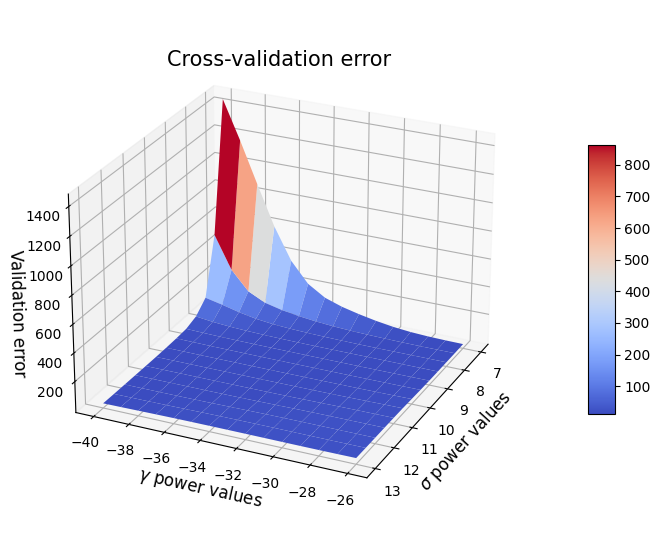

In [31]:
# Generate values for plot
y = range(-40,-25)
x = [(7 +(0.5*i)) for i in range(13)]
print(mse_matrix.shape)
X ,Y = np.meshgrid(x, y)
Z = mse_matrix

# Plot results
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,7))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.view_init(25,25)
ax.dist = 11
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.set_xlabel("$\sigma$ power values", size = 12)
ax.set_ylabel("$\gamma$ power values", size = 12)
ax.set_zlabel("Validation error", size = 12)
ax.set_title("Cross-validation error", y = 1, pad =-9, size = 15)
plt.show()

### c)

In [27]:
# Isolate best gamma and sigma
gamma = best_gamma_sigma[0]
sigma = best_gamma_sigma[1]

# Acquire training set
X_training_set, Y_training_set = data_splitter(training_set)

# Calculate alpha
kernel_matrix_train = gaussian_kernel_matrix(X_training_set, sigma)
alpha_k = alpha(kernel_matrix_train, gamma, len(X_training_set), Y_training_set)

# Predict y values with training set
y_predict_vector = []
for i in range(len(Y_training_set)):
    y_predict_scalar = 0
    for j in range(len(X_training_set)):
        y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set[j], X_training_set[i], sigma)

    y_predict_vector.append(y_predict_scalar)

y_predict_vector = np.array(y_predict_vector)

# Calculate training MSE
sse = sum((Y_training_set - y_predict_vector)**2)
train_mse = sse / len(Y_training_set)

# Acquire testing set
X_test_set, Y_test_set = data_splitter(testing_set)

# Predict y values with test set
y_predict_vector = []
for i in range(len(Y_test_set)):
    y_predict_scalar = 0
    for j in range(len(X_training_set)):
        y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set[j], X_test_set[i], sigma)

    y_predict_vector.append(y_predict_scalar)

y_predict_vector = np.array(y_predict_vector)

# Calculate testing MSE
sse = sum((Y_test_set - y_predict_vector)**2)
test_mse = sse / len(Y_test_set)

# Print results
print("Best gamma and sigma: " + str(best_gamma_sigma[0]) + ", " + str(round(best_gamma_sigma[1], 2)))
print("Training MSE: " + str(round(train_mse, 2)))
print("Testing MSE: " + str(round(test_mse, 2)))

Best gamma and sigma: 1.8189894035458565e-12, 5792.62
Training MSE: 9.34
Testing MSE: 18.54


### d)

In [ ]:
# Acquire new split of data
training_set, testing_set = data_split(data)

iterations = 20
mse_matrix_list = []
best_gamma_sigma_list = []

# Perform test 20 times
for q in range(iterations):

    # Split training data into k segments
    vector_k_fold = k_fold_validation(5, training_set)

    mse_matrix = np.zeros(shape=(len(gamma_vector), len(sigma_vector)))
    best_gamma_sigma= [0,0]
    best_mse = 1e10
    gamma_entry_counter = 0

    # Test each gamma and sigma with data
    for gamma in gamma_vector:
        sigma_entry_counter = 0
        for sigma in sigma_vector:
            mse_k_list = []

            # Acquire k-th training set and testing set
            for z in vector_k_fold:
                training_set_k = z[0]
                testing_set_k = z[1]
                X_training_set_k, Y_training_set_k = data_splitter(training_set_k)
                X_testing_set_k, Y_testing_set_k = data_splitter(testing_set_k)

                # Compute kernel matrix and alpha
                kernel_matrix_train = gaussian_kernel_matrix(X_training_set_k, sigma)
                alpha_k = alpha(kernel_matrix_train, gamma, len(X_training_set_k), Y_training_set_k)

                # Predict y values
                y_predict_vector = []
                for i in range(len(Y_testing_set_k)):
                    y_predict_scalar = 0
                    for j in range(len(X_training_set_k)):
                        y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set_k[j], X_testing_set_k[i], sigma)
                    y_predict_vector.append(y_predict_scalar)
                y_predict_vector = np.array(y_predict_vector)

                # Calculate MSE
                sse_k = sum((Y_testing_set_k - y_predict_vector)**2)
                mse_k = sse_k / len(Y_testing_set_k)
                mse_k_list.append(mse_k)

            # Calculate average MSE
            mse_matrix[gamma_entry_counter][sigma_entry_counter] = (sum(mse_k_list)/len(mse_k_list))

            # Update best gamma and sigma values
            if mse_matrix[gamma_entry_counter][sigma_entry_counter] < best_mse:
                best_mse = mse_matrix[gamma_entry_counter][sigma_entry_counter]
                best_gamma_sigma[0] = gamma
                best_gamma_sigma[1] = sigma

            sigma_entry_counter += 1

        gamma_entry_counter += 1

    mse_matrix_list.append(mse_matrix)
    best_gamma_sigma_list.append(best_gamma_sigma)

mse_matrix_list = np.array(mse_matrix_list)
best_gamma_sigma_list = np.array(best_gamma_sigma_list)

In [29]:
train_mse_list = []
test_mse_list = []

# Compute MSEs for best gamma and sigmas
for best_gamma_sigma in best_gamma_sigma_list:

    # Isolate first gamma, sigma pair
    gamma = best_gamma_sigma[0]
    sigma = best_gamma_sigma[1]

    # Acquire training set
    X_training_set, Y_training_set = data_splitter(training_set)

    # Compute kernel matrix and alpha
    kernel_matrix_train = gaussian_kernel_matrix(X_training_set, sigma)
    alpha_k = alpha(kernel_matrix_train, gamma, len(X_training_set), Y_training_set)

    # Predict y values with training set
    y_predict_vector = []
    for i in range(len(Y_training_set)):
        y_predict_scalar = 0
        for j in range(len(X_training_set)):
            y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set[j], X_training_set[i], sigma)
        y_predict_vector.append(y_predict_scalar)

    y_predict_vector = np.array(y_predict_vector)

    # Calculate training MSE
    sse = sum((Y_training_set - y_predict_vector)**2)
    train_mse = sse / len(Y_training_set)
    train_mse_list.append(train_mse)

    # Acquire test set
    X_test_set, Y_test_set = data_splitter(testing_set)

    # Predict y values with test set
    y_predict_vector = []
    for i in range(len(Y_test_set)):
        y_predict_scalar = 0
        for j in range(len(X_training_set)):
            y_predict_scalar += alpha_k[j] * gaussian_kernel(X_training_set[j], X_test_set[i], sigma)
        y_predict_vector.append(y_predict_scalar)

    y_predict_vector = np.array(y_predict_vector)

    # Calculate test MSE
    sse = sum((Y_test_set - y_predict_vector)**2)
    test_mse = sse / len(Y_test_set)
    test_mse_list.append(test_mse)

ridge_train_mse = np.mean(train_mse_list)
ridge_test_mse = np.mean(test_mse_list)
ridge_train_std = std(train_mse_list)
ridge_test_std = std(test_mse_list)

In [30]:
BOLD = '\033[1m'
END = '\033[0m'

# PRint titles
print(BOLD + "{:<40}".format("Method") + "{:<20}".format("MSE train") + "{:<20}".format("MSE test") + END)

# Print results for naive regression
print("{:<40}".format("Naive Regression") + "{:<20}".format(str(round(ones_train_mse, 2)) + " " + u"\u00B1" + " "
               + str(round(ones_train_std, 2))) + "{:<20}".format(str(round(ones_test_mse, 2)) + " " + u"\u00B1" + " "
               + str(round(ones_test_std, 2))))

# Print results for individual attributes
for i in range(len(indiv_train_mses)):
  print("{:<40}".format("Linear Regression (attribute " + str(i+1) + ")") + "{:<20}".format(str(round(indiv_train_mses[i], 2))
                + " " + u"\u00B1" + " " + str(round(indiv_train_stds[i], 2))) + "{:<20}".format(str(round(indiv_test_mses[i], 2))
                + " " + u"\u00B1" + " " + str(round(indiv_train_stds[i], 2))))

# Print results for all attributes
print("{:<40}".format("Linear Regression (all attributes)") + "{:<20}".format(str(round(all_train_mse, 2)) + " " + u"\u00B1"
               + " " + str(round(all_train_std, 2))) + "{:<20}".format(str(round(all_test_mse, 2)) + " " + u"\u00B1" + " "
               + str(round(all_test_std, 2))))

# Print results for ridge regression
print("{:<40}".format("Kernel Ridge Regression") + "{:<20}".format(str(round(ridge_train_mse, 2)) + " " + u"\u00B1" + " "
               + str(round(ridge_train_std, 2))) + "{:<20}".format(str(round(ridge_test_mse, 2)) + " " + u"\u00B1" + " "
               + str(round(ridge_test_std, 2))))

Method                                  MSE train           MSE test            
Naive Regression                        84.54 ± 5.39        84.47 ± 10.76       
Linear Regression (attribute 1)         72.17 ± 3.96        71.94 ± 3.96        
Linear Regression (attribute 2)         73.87 ± 6.02        73.12 ± 6.02        
Linear Regression (attribute 3)         65.15 ± 5.31        64.2 ± 5.31         
Linear Regression (attribute 4)         81.73 ± 4.91        82.7 ± 4.91         
Linear Regression (attribute 5)         70.56 ± 3.77        66.16 ± 3.77        
Linear Regression (attribute 6)         44.59 ± 3.23        42.12 ± 3.23        
Linear Regression (attribute 7)         73.87 ± 4.15        69.89 ± 4.15        
Linear Regression (attribute 8)         78.33 ± 5.54        81.19 ± 5.54        
Linear Regression (attribute 9)         72.93 ± 5.56        70.94 ± 5.56        
Linear Regression (attribute 10)        65.24 ± 4.37        67.57 ± 4.37        
Linear Regression (attribute

# 2 Part II

# 2.1 k-Nearest Neighbors

## 2.1.1 Generating the Data

### Exercise 6

In [19]:
# Function: Calculate Euclidean distance (vectorized)
def vector_euclidean(centers, all_x):

  # Reshape all_x if datapoint
  if (len(all_x) == 2):
    trans_all_x = np.array([[all_x[0]], [all_x[1]]])
  else:
    trans_all_x = all_x.T

  # Calculate Euclidean distance from each center to each point
  result = np.sqrt(((centers[:,:,None] - trans_all_x[None,:])**2).sum(axis=1))
  return result

# Function: k-NN
def knn(all_x, centers, labels, k):

  # Calculate distances from each center to each point
  distances = vector_euclidean(centers, all_x).T

  # Isolate the k-nearest centers
  nearest_indices = np.argpartition(distances, k)[:,:k]
  nearest_labels = labels[nearest_indices]

  # Count the number of 0 and 1 labels
  counts = np.sum(nearest_labels, axis=1)

  # Generate labels based on k-NN
  labels = [1 if count > k/2 else 0 if count < k/2 else int(np.random.choice([0, 1], 1)) for count in counts]
  return labels

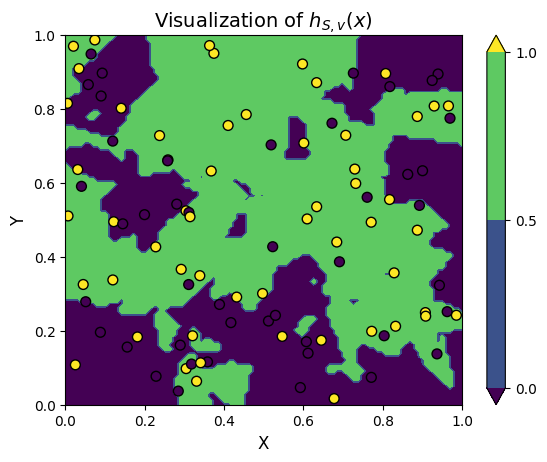

In [23]:
# Random seed for reproducibility
np.random.seed(42)

# Generate random centers and labels
centers = np.random.rand(100, 2)
labels = np.random.choice([0, 1], 100)

# Generate points for map
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# Reshape for plotting
X, Y = np.meshgrid(x, y)

# Reshape for knn
test_centers = np.vstack((X.flatten(), Y.flatten())).T

# Compute predict labels for each x, y pair
pred_labels = np.array(knn(test_centers, centers, labels, 3))

# Reshape for plotting
reshaped_pred_labels = np.reshape(pred_labels, (100, 100))

# Plot results
plt.contourf(X, Y, reshaped_pred_labels, cmap='viridis', levels=[0, 0.5, 1], extend='both')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Visualization of ' + r'$h_{S,v}\left(x\right)$', fontsize = 14)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.show()

## 2.1.2 Estimated Generalization Error of k-NN as a function of k

### Exercise 7

In [ ]:
# Function: Determine label type
def decision(probability):
  return random.random() < probability

# Function: Generate data
def generate_data(num_points, x, centers, labels, k=3):

  # Initialize all labels
  all_labels = np.zeros(num_points)

  # Determine if label is noise or k-NN selected
  for i in range(num_points):
    noise = decision(0.2)

    # If noise, randomly select label
    if noise == True:
      label = np.random.choice([0, 1], 1)

    # Otherwise, select label based on k-NN
    else:
      label = knn(x[i], centers, labels, k)
    all_labels[i] = label[0]

  return all_labels

In [ ]:
# Storage for average errors
average_errors = []

# Testing for k = {1, ..., 49}
for k in range(1,50):

  # Print status updates
  if (k%10 == 0):
    print("Starting run for k = ", k)

  # Initialize error over runs
  total_error = 0

  # Perform 100 runs for each k
  for run in range(100):

    # Sample an h from Ph
    Ph_centers = np.random.rand(100, 2)
    Ph_labels = np.random.choice([0, 1], 100)

    # Sample 4000 training points from Ph(x,y)
    train_num_points = 4000
    train_centers = np.random.rand(train_num_points, 2)
    train_labels = generate_data(train_num_points, train_centers, Ph_centers, Ph_labels)

    # Sample 1000 training points from Ph(x,y)
    test_num_points = 1000
    test_centers = np.random.rand(test_num_points, 2)
    test_labels = generate_data(test_num_points, test_centers, Ph_centers, Ph_labels)

    # Predict test labels
    pred_labels = np.array(knn(test_centers, train_centers, train_labels, k))

    # Compute error
    error = (test_num_points - np.sum(pred_labels == test_labels)) / test_num_points
    total_error += error

  # Compute average error
  average_error = total_error/100
  average_errors.append(average_error)

Starting run for k =  10
Starting run for k =  20
Starting run for k =  30
Starting run for k =  40


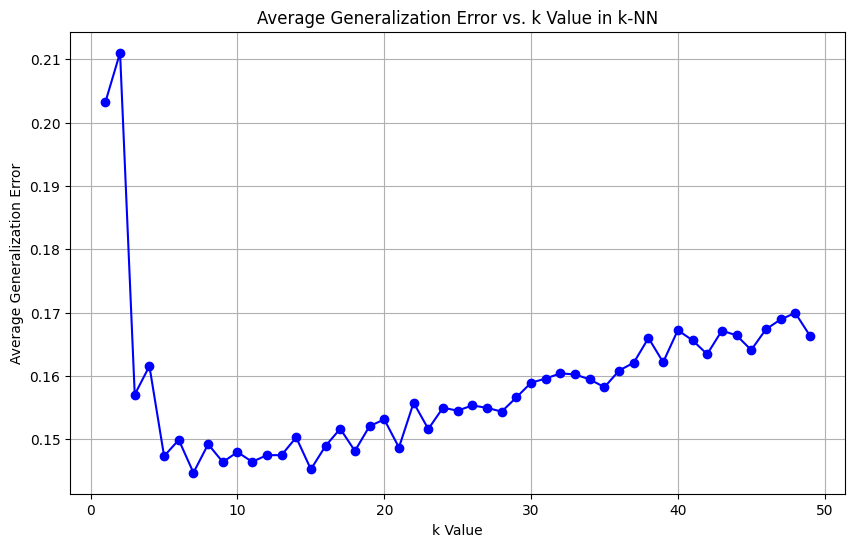

In [ ]:
# Create x-axis
all_ks = [i for i in range(1,50)]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(all_ks, average_errors, marker='o', linestyle='-', color='b')
plt.xlabel('k Value')
plt.ylabel('Average Generalization Error')
plt.title('Average Generalization Error vs. k Value in k-NN')
plt.grid(True)
plt.show()

## 2.1.3 Determine the optimal k as a function of the number of training points (m)

### Exercise 8

In [ ]:
# Storage for optimal k values
average_ks = []

# Training set sizes
ms = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

# Test for all sizes
for m in ms:

  # Print status updates for program
  print("Starting run for m = ", m)

  # Initialize error over runs
  total_k = 0

  # Run 100 trials for each m
  for run in range(100):

    # Storage for errors with each k
    k_errors = []

    # Test for k = {1, ..., 49}
    for k in range(1,50):

      # Sample an h from Ph
      Ph_centers = np.random.rand(100, 2)
      Ph_labels = np.random.choice([0, 1], 100)

      # Sample m training points from Ph(x,y)
      train_centers = np.random.rand(m, 2)
      train_labels = generate_data(m, train_centers, Ph_centers, Ph_labels)

      # Sample 1000 test points from Ph(x,y)
      test_centers = np.random.rand(1000, 2)
      test_labels = generate_data(1000, test_centers, Ph_centers, Ph_labels)

      # Predict test labels
      pred_labels = np.array(knn(test_centers, train_centers, train_labels, k))

      # Compute error
      error = (test_num_points - np.sum(pred_labels == test_labels)) / test_num_points
      k_errors.append(error)

    # Save best k value at each run
    best_k = k_errors.index(min(k_errors)) + 1
    total_k += best_k

  # Determine average best k
  average_k = total_k/100
  average_ks.append(average_k)

Starting run for m =  100
Starting run for m =  500
Starting run for m =  1000
Starting run for m =  1500
Starting run for m =  2000
Starting run for m =  2500
Starting run for m =  3000
Starting run for m =  3500
Starting run for m =  4000


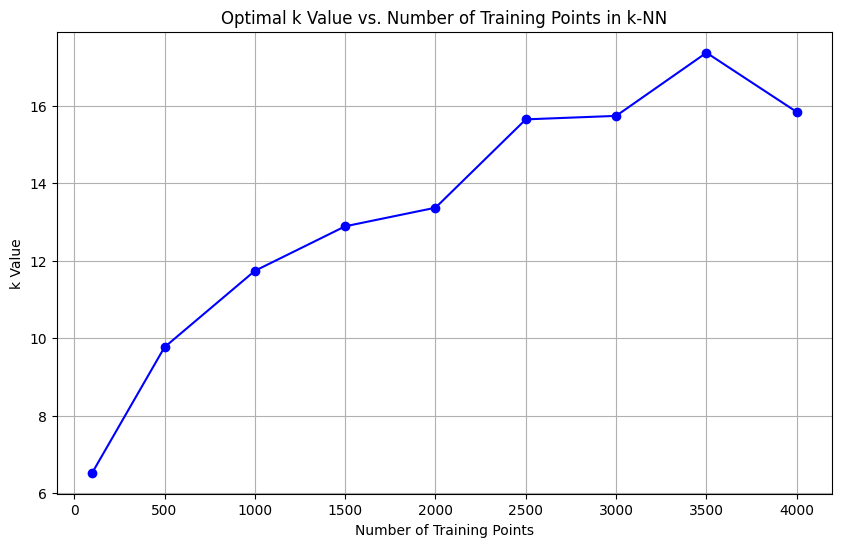

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ms, average_ks, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Training Points')
plt.ylabel('k Value')
plt.title('Optimal k Value vs. Number of Training Points in k-NN')
plt.grid(True)
plt.show()